In [1]:
# Import packages
import os
import sys
import yaml
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.stats as stats
sc.settings.verbosity = 0

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set sc verbosity
sc.settings.verbosity = 0

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [11]:
sys.path.append("/cellar/users/aklie/data/datasets/tf_perturb_seq/config")
from loader import load_colors

dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

In [2]:
path_h5ad = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/reduce_dimensions/seurat_default_pca.h5ad"

# Load AnnData

In [3]:
adata = sc.read_h5ad(path_h5ad)
adata

AnnData object with n_obs × n_vars = 357980 × 7953
    obs: 'batch', 'cov1', 'batch_number', 'n_counts', 'log1p_n_genes_by_counts', 'total_gene_umis', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'percent_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'num_expressed_genes', 'sample', 'total_counts', 'leiden_1'
    var: 'sctransform_genes'
    obsm: 'X_seurat_default', 'X_seurat_default_umap', 'sctransform_scale_data'
    layers: 'log1p_norm'

In [6]:
adata.obsm["X_umap"] = adata.obsm["X_seurat_default_umap"].copy()

/tmp/ipykernel_2012910/3594709157.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


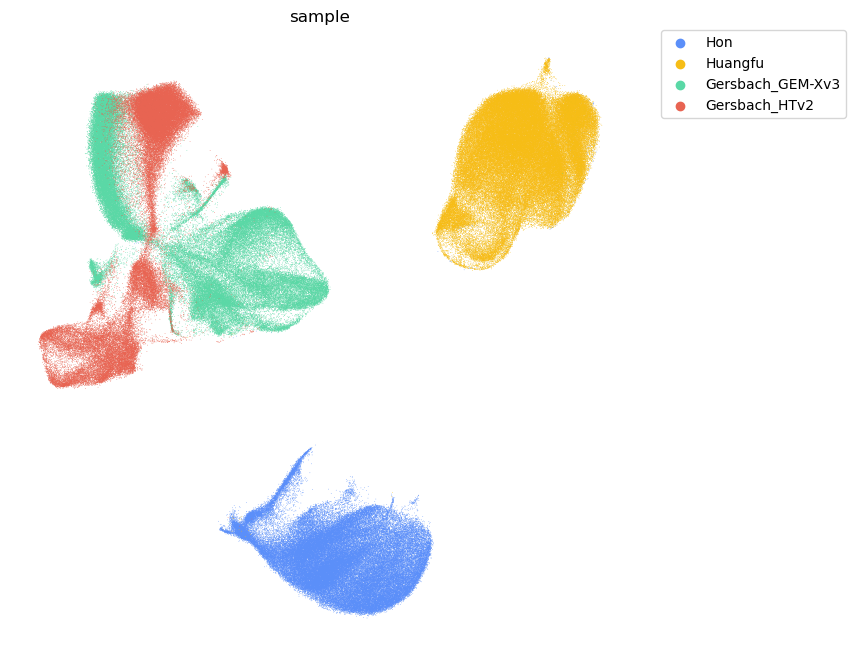

In [22]:
# Pick a continuous covariate to plot nice scatterplot with large x and y labels and title
covariate = "sample"
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sc.pl.umap(adata, color=covariate, show=False, frameon=False, ax=ax, s=1, palette=dataset_colors)

# Remove WTC11_benchmark_TF-Perturb-seq from legend
legend = ax.get_legend()
handles = legend.legendHandles
labels = [text.get_text().replace("_WTC11-benchmark_TF-Perturb-seq", "") for text in legend.get_texts()]
ax.legend(handles, labels, title="", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

#plt.savefig(os.path.join(path_outdir, "embeddings", f"umap_{covariate}.png"), bbox_inches="tight")

<Axes: title={'center': 'leiden_1'}, xlabel='UMAP1', ylabel='UMAP2'>

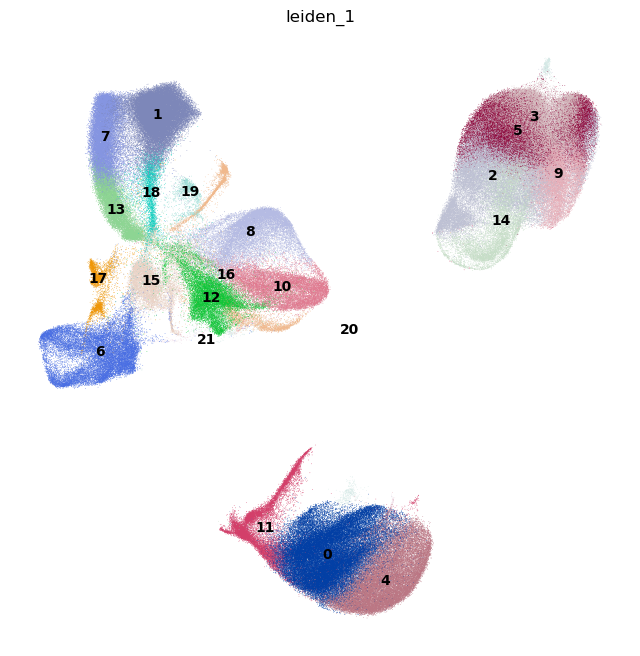

In [25]:
# Pick a continuous covariate to plot nice scatterplot with large x and y labels and title
covariate = "leiden_1"
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sc.pl.umap(adata, color=covariate, show=False, frameon=False, ax=ax, s=1, legend_loc="on data")


#plt.savefig(os.path.join(path_outdir, "embeddings", f"umap_{covariate}.png"), bbox_inches="tight")